<img src="https://comet.ml/images/logo_comet_light.png" width="200px"/>

# MNIST Example in keras

This Jupyter notebook demonstrates using the **keras** deep learning framework with [comet.ml](https://comet.ml).

In this example, we build a keras model, and train it on the MNIST dataset.

keras is a framework built on top of lower level libraries, such as TensorFlow, or the Cognitive Toolkit. 

To find out more, you might find these links helpful:

* https://keras.io/
* https://en.wikipedia.org/wiki/MNIST_database
* http://jupyter.org/

Let's get started!

## 1. Imports

First, we import the comet_ml library, followed by the keras library, and others if needed. The only requirement here is that **comet_ml be imported first**. If you forget, just restart the kernel, and import them in the proper order.

In [1]:
## Import this first:
from comet_ml import Experiment

## Import the deep learning framework:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.callbacks import Callback
from keras.preprocessing import image

Using TensorFlow backend.


## 2. Dataset

As a simple demo, we'll start with the the MNIST dataset. In keras, we use the `load_data` method to download and load the data:

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's see what we have here. 

* x_train are the training inputs
* y_train are the training targets
* x_test are the test/validation inputs
* y_test are the test/validation targets

These are numpy tensors, so we can get the shape of each:

In [3]:
x_train.shape

(60000, 28, 28)

That is, there are 60,000 training inputs, each 28 x 28. These are pictures of numbers.

To visualize the patterns, we write a little function.

In [4]:
def array_to_image(array, shape, scale):
    img = image.array_to_img(array.reshape([int(s) for s in shape]))
    x, y = img.size
    img = img.resize((x * scale, y * scale))
    return img

We call it by providing a vector, a shape (rows, cols, color depth), and a scaling factor:

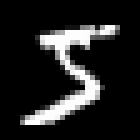

In [5]:
array_to_image(x_train[0], (28, 28, 1), 5)

Often, we need to do a little preparation of the data to get it ready for the learning model. Here, we flatten the inputs, and put input values in the range 0 - 1:

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


Also, we examine the targets:

In [7]:
y_train.shape

(60000,)

We see that they are just 60,000 values. These are the integer representation of the picture. In this example, we wish to have 10 outputs representing, in a way, the probability of what the picture represents. 

To turn each number 0-9 into a 10-output vector for training, we use the `keras.utils.to_categorical` function to turn it into a so-called "one hot" representation:

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

We then can check to see if the picture above is labeled correctly:

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Indeed, the first pattern is a 5. We can also visualize this vector like so:

In [10]:
array_to_image(y_train[0], (1, 10, 1), 20)

We can see the "one hot" representation showing that y_train[0][5] is 1.0, and all of the rest are zeros.

Now we can create a model, and train the network:

## 3. Model

In this example, we will build a 5-layer (counting input and output layers), fully-connected neural network. We create a function to make the model for us:

In [11]:
def build_model_graph(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(128, activation="sigmoid", input_shape=(784,)))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        loss="categorical_crossentropy", optimizer=RMSprop(), 
        metrics=["accuracy"]
    )
    return model

And call it to create the model:

In [12]:
model = build_model_graph()

We use the summary method to check the details:

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


## 4. Experiment

In order for comet.ml to log your experiment and results, you need to create an Experiment instance. To do this, you'll need two items:

* a Comet `api_key`
* a `project_name`

You can find your Comet api_key when you log in to https://comet.ml and click on your project. You should see a screen that looks similar to:

![comet login screen](comet-key.png)

Click on the API key to copy the key to your clipboard. 

It is recommended that you put your COMET_API_KEY in a `.env` key in the current directory. You can do that using the following code. Put it in a cell, replace the `...` with your key, and then delete the cell. That way your key stays private.

```ipython
%%writefile .env

COMET_API_KEY=...
```

It is also recommended that you use your project_name in the cell, so you can match the results with this code. You can make up a new name, or add this experiment to a project that already exists.

In [14]:
experiment = Experiment(project_name="comet-notebooks")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c



If you get the error that ends with:

<pre style="background-color:#FDD;">
ValueError: Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
</pre>

then that means that either you don't have an `.env` file in this directory, or the key is invalid.

Otherwise, you should see the message:

<pre style="background-color:#FDD;">
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/...
</pre>

If you click the URL, then a new page will open up. But, even better, you can execute the following line to see the experiment in the current notebook:

In [15]:
experiment.display()

By the way, the line `experiment.display()` works when you are at the console too. It will open up a window in your browser.

By default, the above display shows the Charts tab, but says "No plotable data points were found." Indeed, we haven't logged any data yet. Let's log some data!

Comet.ml has a method to log a hash of the dataset, so that we can see if it changes:

In [16]:
experiment.log_dataset_hash(x_train)

If you view the "Hyper parameters" tab in the display, you should now see "dataset_hash" and a value in the table.

Now, we are ready for training!

## 5. Training

For this example, we are going to use our `array_to_image` function to watch the hidden layer representations for a particular input change over time. In addition, we will log these images to Comet.ml.

First, we construct a keras callback that will call our array_to_image and log it to Comet.ml.

In [17]:
class VizCallback(Callback):
    def __init__(self, model, tensor, filename, experiment, shape):
        self.mymodel = model
        self.tensor = tensor
        self.filename = filename
        self.experiment = experiment
        self.shape = shape

    def on_epoch_end(self, epoch, logs=None):
        if "%s" in self.filename:
            filename = self.filename % (epoch,)
        else:
            filename = self.filename
        log_image(self.mymodel, self.tensor, filename,
                  self.experiment, self.shape)

Comet.ml requires that we give the `experiment.log_image()` a filename, so we wrap our function in a function that will save the image to a file, and call log_image:

In [18]:
def log_image(model, tensor, filename, experiment, shape):
    output = model.predict(tensor)
    img = array_to_image(output[0], shape, 10)
    img.save(filename)
    experiment.log_image(filename)

Because we want to see the hidden layer activations, we need to build a model between the input and that hidden layer. We can do that with this function:

In [19]:
def build_viz_model(model, visualize_layer):
    viz_model = Model(inputs=[model.input],
                      outputs=[model.layers[visualize_layer].output])
    return viz_model

Now we can define the models and callbacks for the hidden layers:

In [20]:
viz_model1 = build_viz_model(model, 1)
viz_model3 = build_viz_model(model, 3)

callbacks = [
    VizCallback(viz_model1, x_train[0:1], "hidden-epoch-%s.gif",
                experiment, (8,16,1)),
    VizCallback(viz_model3, x_train[0:1], "output-epoch-%s.gif",
                experiment, (1,10,1)),
]

Now, we merely need to call `model.fit()`:

In [21]:
model.fit(
    x_train, y_train,
    batch_size=120,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=callbacks);

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.7472 - acc: 0.7903 - val_loss: 0.3090 - val_acc: 0.9089
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2542 - acc: 0.9244 - val_loss: 0.2167 - val_acc: 0.9324
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1844 - acc: 0.9451 - val_loss: 0.1719 - val_acc: 0.9489
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1448 - acc: 0.9569 - val_loss: 0.1383 - val_acc: 0.9595
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1192 - acc: 0.9644 - val_loss: 0.1308 - val_acc: 0.9603
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0998 - acc: 0.9701 - val_loss: 0.1149 - val_acc: 0.9637
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0864 - acc: 0.9742 - val_loss: 0.1009 - val_acc

Now, if you visit the "Charts" tab in the display, you should see plots of the accuracy (acc), loss, validation accuracy (val_acc), and validation loss (val_loss).

You'll also see information on many of the tabs, including images on the "Graphics" tab. You won't see anything on the "Code" tab, yet. That will be updated last when we are in a Jupyter environment (like this notebook).

# 6. Logging

In keras, Comet will automatically log:

* the model description
* the training loss
* the training accuracy
* the training validation loss
* the training validation accuracy
* the source code

To log other items manually, you can use any of the following:

* `experiment.log_html(HTML_STRING)`
* `experiment.html_log_url(URL_STRING)`
* `experiment.image(FILENAME)`
* `experiment.log_dataset_hash(DATASET)`
* `experiment.log_other(KEY, VALUE)`
* `experiment.log_metric(NAME, VALUE)`
* `experiment.log_parameter(PARAMETER, VALUE)`
* `experiment.log_figure(NAME, FIGURE)`

For complete details, please see: 

https://www.comet.ml/docs/python-sdk/Experiment/#experiment

# 6. Finish

Finall, we are ready to tell Comet that our experiment is complete. You don't need to do this is a script that ends. But in Jupyter, we need to indicate that the experiment is finished. We do that with the `experiment.end()` method:

In [22]:
experiment.end()

COMET INFO: Uploading stats to Comet before program termination (may take several seconds)
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cometpublic/comet-notebooks/7092a5e4c362453fb0b3f06785a1d30c



That's it! If you have any comments or questions, please visit us on https://cometml.slack.com